In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from datetime import datetime
import pytz

In [26]:
# Linear Regression Model without any optmizer
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def validation_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Validation Mean Squared Error: {mse:.2f}")
    print(f"Validation Mean Absolute Error: {mae:.2f}")
    print(f"Validation R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))

def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test Mean Absolute Error: {mae:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Prepare data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Train model
model = train_model(X_train, y_train)

# Test model on validation set
validation_model(model, X_validation, y_validation)

# Test model on test set
test_model(model, X_test, y_test)



Validation Mean Squared Error: 427.95
Validation Mean Absolute Error: 15.02
Validation R-squared: 0.46
Local Date and Time: 2024-09-20 23:10:45
Test Mean Squared Error: 400.23
Test Mean Absolute Error: 15.19
Test R-squared: 0.52
Local Date and Time: 2024-09-20 23:10:45


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31890.1270 - val_loss: 29694.4531
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29222.6602 - val_loss: 27080.9453
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26505.4180 - val_loss: 24466.1602
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24101.2773 - val_loss: 22150.9434
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21915.8320 - val_loss: 19849.5957
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20144.6289 - val_loss: 17647.3926
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18113.5078 - val_loss: 15612.1592
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16132.4629 - val_loss: 13765.0801
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14145.5264 - val_loss: 11935.2148
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13632.4043 - val_loss: 10248.8965
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11733.8047 - val_loss: 8746.594

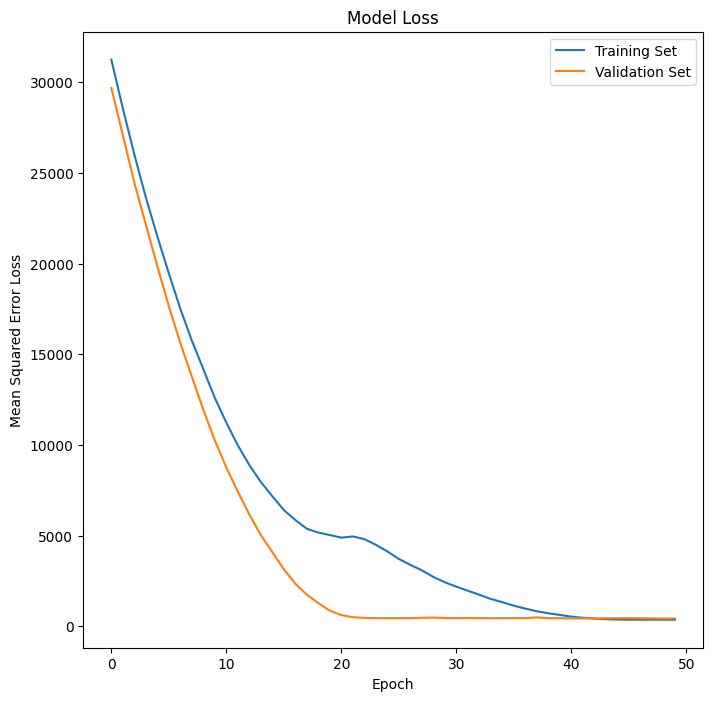

In [4]:
# Linear Regression Model with SGD optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the regression model
    model = Sequential([Dense(1, input_dim=X_train.shape[1], activation='linear')])


    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 32053.6738 - val_loss: 29708.0879
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29012.1348 - val_loss: 27228.6816
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26672.5898 - val_loss: 24858.6680
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24370.7617 - val_loss: 22692.8965
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21967.2090 - val_loss: 20651.9277
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19887.2852 - val_loss: 18771.4062
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18151.2207 - val_loss: 17048.4668
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16335.5488 - val_loss: 15451.2031
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14862.3105 - val_loss: 13901.6670
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13247.9219 - val_loss: 12546.1709
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12144.5547 - val_lo

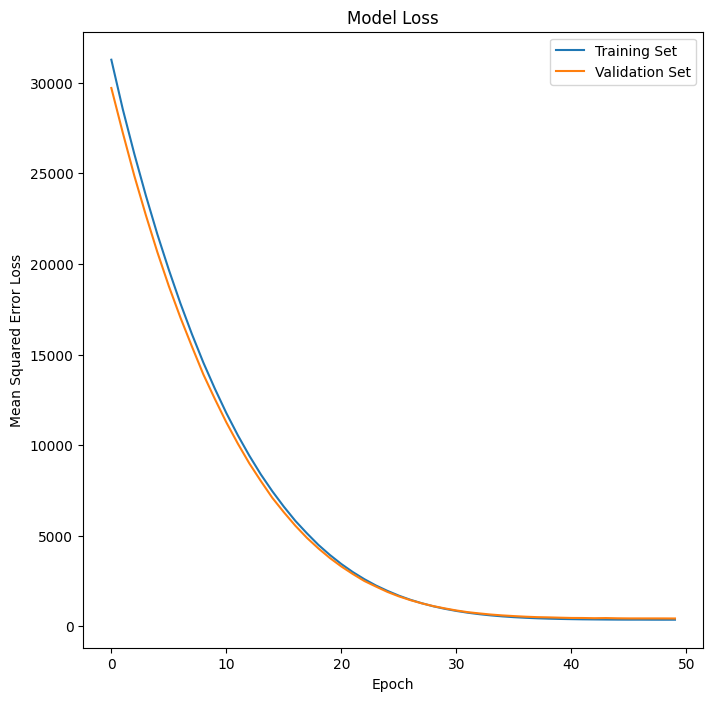

In [12]:
# Linear Regression Model with Adam optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the regression model
    model = Sequential([Dense(1, input_dim=X_train.shape[1], activation='linear')])


    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32460.1914 - val_loss: 32197.6270
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32168.1465 - val_loss: 31882.4492
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31960.9102 - val_loss: 31588.5508
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31757.1387 - val_loss: 31294.3477
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31307.1855 - val_loss: 31013.1777
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30923.4883 - val_loss: 30737.5020
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30577.7637 - val_loss: 30460.3223
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30468.9062 - val_loss: 30175.3418
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30118.8242 - val_loss: 29892.9805
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 29868.2598 - val_loss: 29618.4746
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 29678.1953 - val_loss: 29345.77

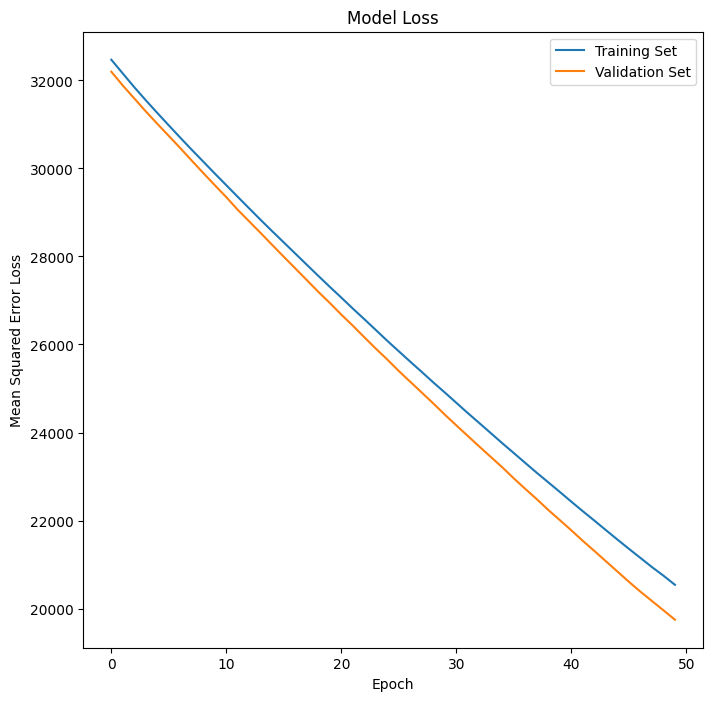

In [9]:
# Linear Regression Model with SGD optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the regression model
    model = Sequential([Dense(1, input_dim=X_train.shape[1], activation='linear')])


    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32452.5430 - val_loss: 32234.7578
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32522.7383 - val_loss: 31927.5996
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31766.6172 - val_loss: 31630.3828
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31966.1562 - val_loss: 31342.9805
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31465.9023 - val_loss: 31073.0332
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31068.2617 - val_loss: 30802.0039
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30727.0684 - val_loss: 30533.6758
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30610.2129 - val_loss: 30268.4824
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30412.7793 - val_loss: 30003.2617
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29880.5781 - val_loss: 29741.5508
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29777.8965 - val_los

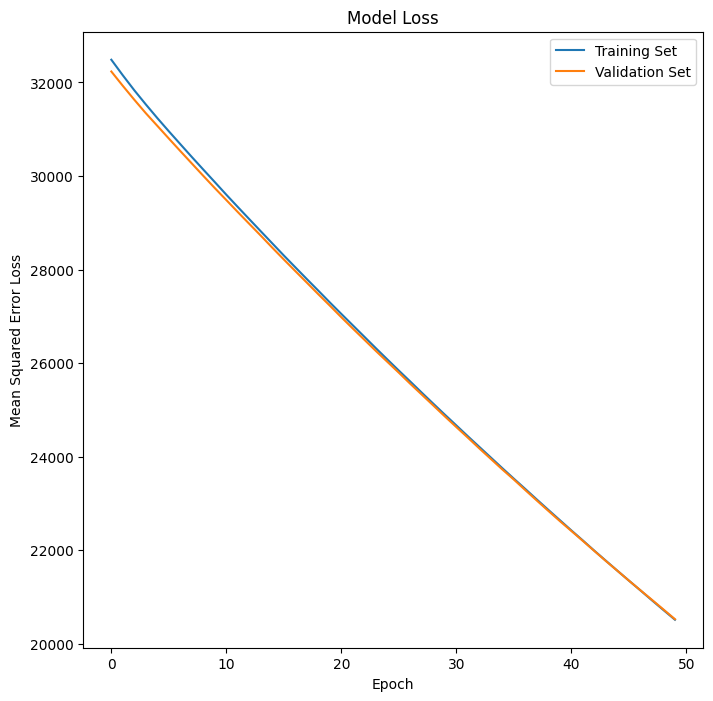

In [13]:
# Linear Regression Model with Adam optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the regression model
    model = Sequential([Dense(1, input_dim=X_train.shape[1], activation='linear')])


    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32544.2656 - val_loss: 32464.4434
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32648.9766 - val_loss: 32430.2461
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32342.4336 - val_loss: 32396.2695
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32513.3770 - val_loss: 32362.1074
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32689.8203 - val_loss: 32328.0527
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32467.9629 - val_loss: 32293.9707
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32414.6133 - val_loss: 32260.8887
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32450.3711 - val_loss: 32228.0254
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32512.4375 - val_loss: 32194.9316
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32025.3184 - val_loss: 32161.2891
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32702.0254 - val_loss: 32128.43

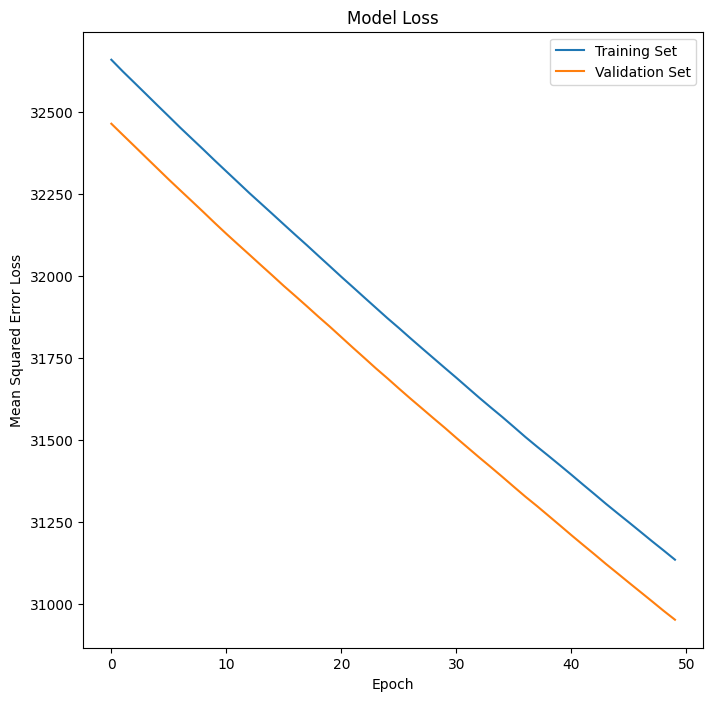

In [10]:
# Linear Regression Model with SGD optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the regression model
    model = Sequential([Dense(1, input_dim=X_train.shape[1], activation='linear')])


    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32619.1426 - val_loss: 32472.3906
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32355.3184 - val_loss: 32437.8828
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32272.0547 - val_loss: 32405.4141
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32630.9141 - val_loss: 32371.5254
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32150.8730 - val_loss: 32338.4785
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32499.5059 - val_loss: 32306.4844
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32682.4805 - val_loss: 32272.8105
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32658.5176 - val_loss: 32240.9023
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32430.3340 - val_loss: 32209.2812
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32296.3105 - val_loss: 32177.7598
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32154.4785 - val_loss: 32146.78

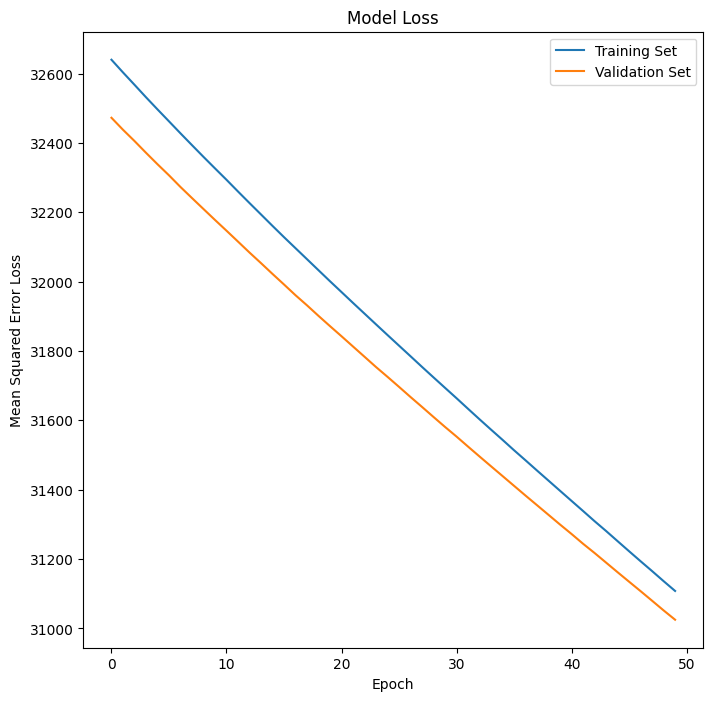

In [15]:
# Linear Regression Model with Adam optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the regression model
    model = Sequential([Dense(1, input_dim=X_train.shape[1], activation='linear')])


    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32941.1289 - val_loss: 32468.8223
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32415.9062 - val_loss: 32465.5605
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32418.3008 - val_loss: 32462.4238
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32425.1621 - val_loss: 32459.1992
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32842.6289 - val_loss: 32455.8984
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32794.1367 - val_loss: 32452.5898
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32677.1641 - val_loss: 32449.2188
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32425.0039 - val_loss: 32445.8691
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32512.1934 - val_loss: 32442.5254
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32750.2441 - val_loss: 32439.1875
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32627.0586 - val_loss: 32435.83

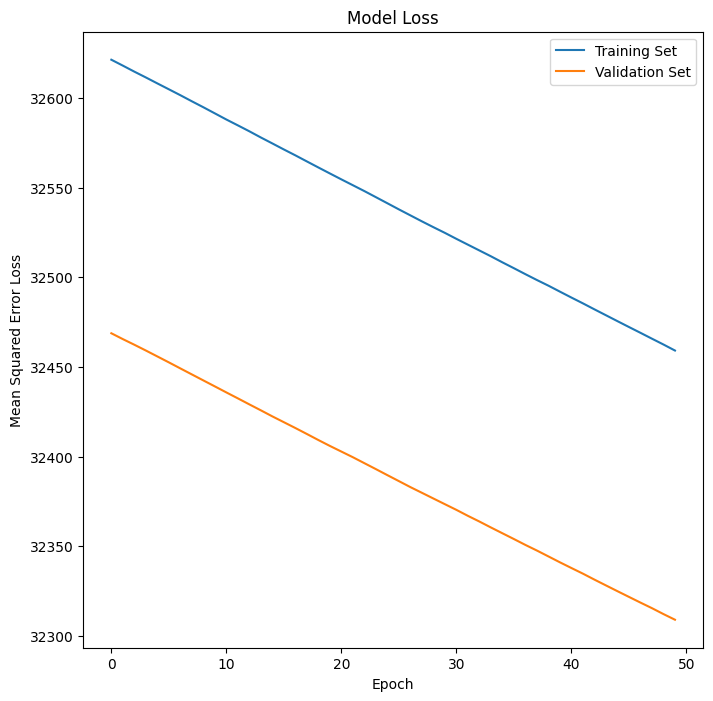

In [11]:
# Linear Regression Model with SGD optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the regression model
    model = Sequential([Dense(1, input_dim=X_train.shape[1], activation='linear')])


    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.0001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 32771.4023 - val_loss: 32486.8516
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32804.2109 - val_loss: 32483.4238
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32729.3516 - val_loss: 32480.1973
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32934.1172 - val_loss: 32476.8008
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32536.1816 - val_loss: 32473.4023
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32820.9414 - val_loss: 32470.1113
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32560.4883 - val_loss: 32466.6133
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32512.7539 - val_loss: 32463.4453
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32957.7500 - val_loss: 32460.1152
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33049.0195 - val_loss: 32456.7109
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32472.8633 - val_los

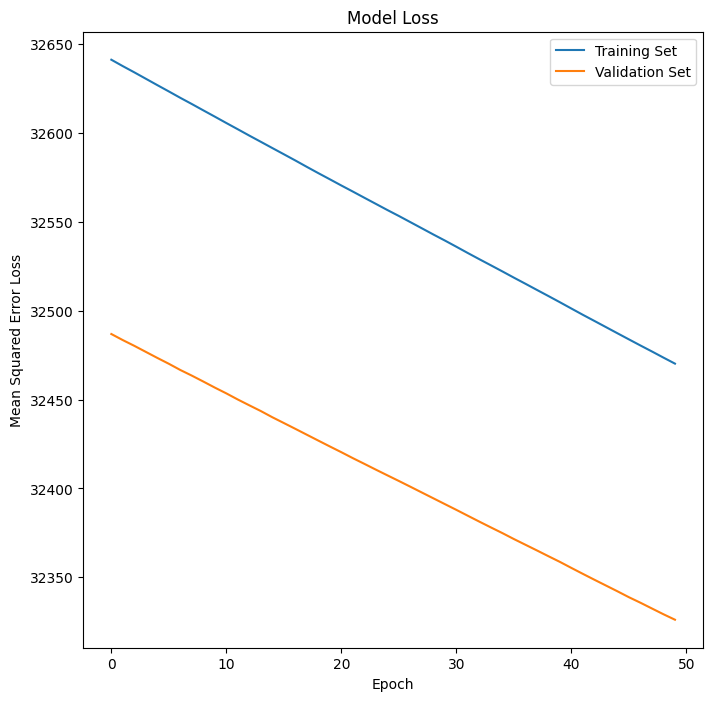

In [16]:
# Linear Regression Model with Adam optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the regression model
    model = Sequential([Dense(1, input_dim=X_train.shape[1], activation='linear')])


    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()
